In [2]:

import os
zip_file_path = "/content/drive/MyDrive/Screenshot_2024-10-05-17-17-37-96_412a1b6c207f389237bf8ff036742b0a.jpg"
extract_path = "Images"
os.makedirs(extract_path, exist_ok=True)

print("Files extracted to:", extract_path)

Files extracted to: Images


In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Screenshot_2024-10-05-17-17-37-96_412a1b6c207f389237bf8ff036742b0a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


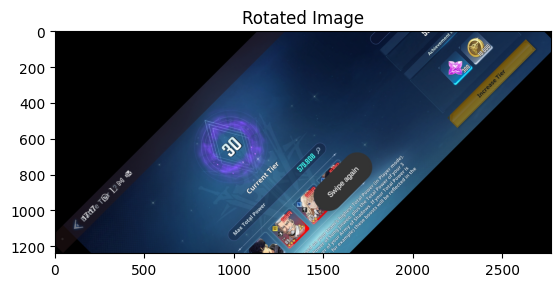

In [4]:
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(rotated)
plt.title('Rotated Image')
plt.show()


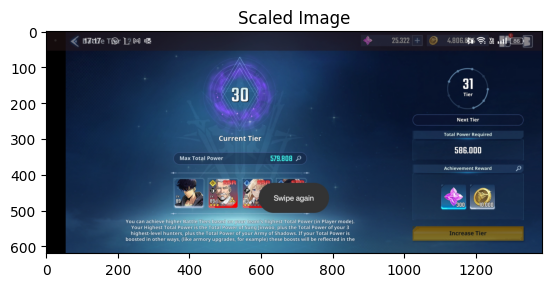

In [5]:
scaled = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(scaled)
plt.title('Scaled Image')
plt.show()


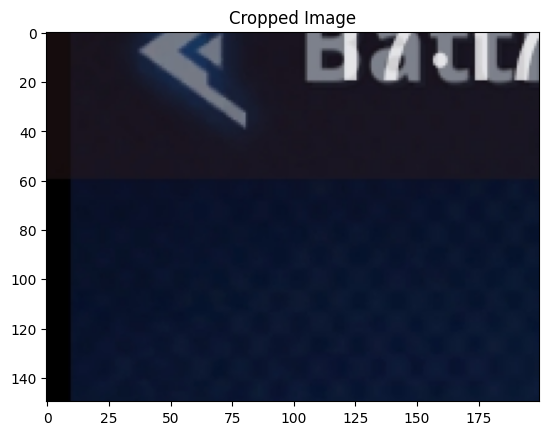

In [6]:
cropped = img[50:200, 100:300]
plt.imshow(cropped)
plt.title('Cropped Image')
plt.show()


In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
split_idx = int(0.8 * len(x_train))
x_train, x_valid = x_train[:split_idx], x_train[split_idx:]
y_train, y_valid = y_train[:split_idx], y_train[split_idx:]
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8647 - loss: 0.4754 - val_accuracy: 0.9546 - val_loss: 0.1494
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.1222 - val_accuracy: 0.9667 - val_loss: 0.1098
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9757 - loss: 0.0794 - val_accuracy: 0.9682 - val_loss: 0.1097
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0535 - val_accuracy: 0.9707 - val_loss: 0.0968
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0439 - val_accuracy: 0.9747 - val_loss: 0.0932
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0322 - val_accuracy: 0.9742 - val_loss: 0.0973
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9914 - loss: 0.0252 - val_accuracy: 0.9693 - val_loss: 0.1184
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0240 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1314
Test Accuracy: 0.97
